<a href="https://colab.research.google.com/github/farhanSH/py/blob/master/Assignment_2_170204066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [34]:
import numpy as np
from numpy import exp, array, random, dot

import pandas as pd
import tensorflow as tf

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading Dataset

In [ ]:
df = pd.read_csv("/Dataset.csv")
df

# Data visualization

In [36]:
df['Sentiment'].unique()

array([ 1, -1])

In [ ]:
df.describe()

In [8]:
# check the number of positive vs. negative tagged sentences

#df['Sentiment'].value_counts()

positives = df['Sentiment'][df.Sentiment == 1 ]
negatives = df['Sentiment'][df.Sentiment == -1 ]

print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         5791
No. of positve tagged sentences is:  3685
No. of negative tagged sentences is: 2106


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


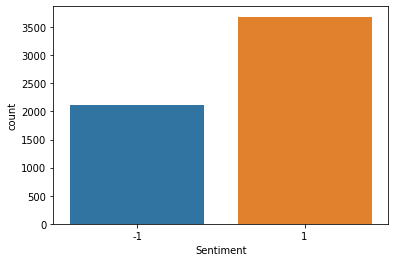

In [9]:
sns.countplot(df['Sentiment'])

In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import string
import pickle
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

In [12]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)


{'during', 'down', "wouldn't", 'than', 's', "needn't", 'because', 'ma', 'had', "aren't", 'too', 'mustn', 'against', 'how', 'each', 'his', 'through', 'ourselves', "you'll", 'into', 'again', 'she', 'mightn', 'very', 'our', 'their', 'here', 'should', "mustn't", 'm', 'which', 'before', 'her', 'this', 'when', 'having', 'is', 'by', 'him', "she's", 'on', 'of', 'we', 'same', 'with', 'both', "it's", 'below', "mightn't", 'in', 'himself', 'were', 'then', 'other', 'couldn', 'don', 'doesn', "don't", "wasn't", 'been', 'an', 'doing', 'at', 'between', 'out', 're', "doesn't", "you've", 'those', 'hasn', 'now', 'haven', 'only', 'after', 't', 'be', 'some', 'hadn', 'will', 'to', 'further', 'ours', 'until', 'hers', 'y', 'needn', 'yourselves', 'the', 'such', 'wouldn', "won't", 'll', 'ain', 'own', 'he', 've', 'above', "shan't", "didn't", 'didn', 'me', "should've", 'where', "couldn't", 'no', 'o', "weren't", 'over', 'yours', 'up', "isn't", 'you', 'most', 'all', 'was', 'once', 'myself', 'weren', 'why', 'these', 

In [13]:
word_list = list()
for i in range(len(df)):
    li = df.Text[i].split()
    for k in li:
        word_list.append(k)

In [14]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324)]

# Data Processing

In [15]:
seed = 170204066
torch.manual_seed(seed)

In [16]:
df["Sentiment"] = df["Sentiment"].replace(-1,0)
df["Sentiment"].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [ ]:
#Checking if any null values present
(df.isnull().sum() / len(df))*100

In [18]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

In [19]:

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_text(text):
  # Lower Casing
    text = text.lower()
    text=text[1:]
    # Removing all URls 
    text = re.sub(urlPattern,'',text)
    # Removing all @username.
    text = re.sub(userPattern,'',text) 
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopwordSet]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)   

In [20]:
df['processed_text'] = df['Text'].apply(lambda x: process_text(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [21]:
print(df.shape)
df

(5791, 3)


,Text,Sentiment,processed_text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,ickers watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,ser aap movie 55 return feageed indicator 15 t...
2,user I'd be afraid to short AMZN - they are lo...,1,ser id afraid short amzn looking like nearmono...
3,MNTA Over 12.00,1,nta 1200
4,OI Over 21.37,1,2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,ndustry body cii said discoms likely suffer ne...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,gold price slip r 46000 investor book profit a...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,orkers bajaj auto agreed 10 wage cut period ap...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex day high 600 point nif...


# Create the (B.O.W) bag of word model

In [22]:
cv = CountVectorizer(max_features = len(df))
X = cv.fit_transform(df['processed_text']).toarray()
y= df['Sentiment'].to_numpy()

#X = torch.from_numpy(X).type(torch.LongTensor)
#y = torch.from_numpy(y).type(torch.LongTensor)

X = torch.from_numpy(X)
y = torch.from_numpy(y)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [23]:
## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = seed)

X_train = X_train.type(torch.FloatTensor)
X_test = X_test.type(torch.FloatTensor)
y_train = y_train.type(torch.FloatTensor)
y_test = y_test.type(torch.FloatTensor)

In [24]:

#BATCH_SIZE = 264

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



# Model Building <a id="7"></a>

**Neural Network**

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, 512) 
        self.layer_2 = nn.Linear(512, 128) 
        self.layer_3 = nn.Linear(128, 1)   
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout()
        # self.flatten = nn.Flatten()
       
     
  
        
    def forward(self, x):

        x = self.layer_1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.layer_3(x)
        logits = self.sigmoid(x)
        return logits

In [26]:
model = NeuralNetwork(len(df))
print(model)



NeuralNetwork(
  (layer_1): Linear(in_features=5791, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
)


Optimization

In [27]:
"""
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

"""


import torch.optim as optim
optimizer = optim.Adam(model.parameters())

loss_fn = nn.BCEWithLogitsLoss()
model = model.to(device)
loss_fn = loss_fn.to(device)



We implement the function to calculate accuracy...

In [28]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [29]:

def trainModel(model, loss_fn, optimizer):
    model.train()

    batch = 256
    size = X_test.shape[0]

    loss = 0
    acc = 0
    

    for i in range(X_train.shape[0]):
      x, y = X_train[i], torch.tensor([y_train[i]], dtype=torch.float)
    
      # Compute prediction 
      pred = model(x)
      loss += loss_fn(pred,y)
      acc += binary_accuracy(pred,y)
      
      if i>0 and (i+1)%batch == 0:
          # Backpropagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
         # print(f'Training Loss: {loss.item():.4f}', end="\r")
         # print(f'\tTraining Loss: {loss.item():.3f} | Training Acc: {acc.item()*100:.2f}%')
          loss = 0
          acc = 0
    print()
    return loss.item()/size, acc.item()/size




In [30]:
from numpy.lib.function_base import append


TP=[]
TN=[]
FP=[]
FN=[]
def testModel(model, loss_fn):
    model.eval()

    size = X_test.shape[0]

    loss = 0
    acc = 0



    with torch.no_grad():
      for i in range(X_test.shape[0]):
        x, y = X_test[i], torch.tensor([y_test[i]], dtype=torch.float)
    
        # Compute prediction error
        pred = model(x)
        if( (torch.round(pred)) == 1 and y== 0) :
           FP.append(1)
        if( (torch.round(pred)) == 0 and y== 1) :
           FN.append(1)
        if( (torch.round(pred)) == 1 and y== 1) :
           TP.append(1)
        if( (torch.round(pred)) == 0 and y== 0) :
           TP.append(1)         
       
            
        loss += loss_fn(pred, y).item()
        acc += binary_accuracy(pred,y).item()
      
    loss /= size
    acc /= size
    
    #print(f'Testing Loss: {loss}')
    #print(f'\t Val. Loss: {loss:.3f} |  Val. Acc: {acc*100:.2f}%')
  
    return loss, acc  

And also create a nice function to tell us how long our epochs are taking.

In [ ]:
f1score

0.8631682197155469